# The purpose of this application is to produce Ternary scatter graphs regarding rock and mineral geochemical data. 

**Copy data from Google Drive to Colaboratory**

https://www.mikulskibartosz.name/how-to-load-data-from-google-drive-to-pandas-running-in-google-colaboratory/

In [9]:
'''What does it do? Imports libraries that allow us to access 
Google Drive and allows the Google Cloud SDK 
to access the Google Drive of the currently logged in user. 
As a result, you can access your files from python code running in Colaboratory.'''

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os
import pandas as pd
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [14]:
'''it is not so easy to find the identifier of a file. To find such identifier, 
we must list the files in the directory: The code prints names and identifiers 
of the files in the directory. Copy the identifier of the file you want to open. 
You are going to need it.'''

listed = drive.ListFile({'q': "title contains 'database_sf_2022_05_py' and '1FdRHCwSGudmhed5hdtIgL0bdk36XmOnR' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title database_sf_2022_05_py.xlsx, id 15MutViYlkOGE2DZqLLNqyqSbp8hFpW4y


In [15]:
### LIBRARIES ###

import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import plotly.figure_factory as ff
import numpy as np

In [20]:
'''First of all, let’s create a local directory to store a copy of the file:'''

download_path = os.path.expanduser('~/data')
try:
  os.makedirs(download_path)
except FileExistsError:
  pass

'''Now we have the file id and the output directory. We can copy the file from Google Drive:'''

output_file = os.path.join(download_path, 'database_sf_2022_05_py.xlsx')
temp_file = drive.CreateFile({'id': '15MutViYlkOGE2DZqLLNqyqSbp8hFpW4y'})
temp_file.GetContentFile(output_file)


dados = pd.read_excel(output_file)

In [21]:
print(dados.head(3))

  SAMPLENO COLLARID          N         E     ELEV  FROM   TO  Cota Amostra  \
0   B-1451  FDSF-01  8260200.0  482350.0  399.586   0.0  1.0       398.586   
1   B-1453  FDSF-01  8260200.0  482350.0  399.586   2.0  3.0       396.586   
2   B-1454  FDSF-01  8260200.0  482350.0  399.586   3.0  4.0       395.586   

   Espessura  LC  ...    CO%    NI%  SIO2%  AL2O3%  MGO%  TIO2%  P2O5%   CAO%  \
0        1.0  R1  ...  0.148  0.567   13.1     4.2  1.20    1.9   0.09  0.030   
1        1.0  R3  ...  0.147  0.769    7.8     4.1  0.96    1.8   0.06  0.010   
2        1.0  R5  ...  0.133  0.941    7.7     2.9  1.10    1.7   0.05  0.005   

   CR2O3%  LOI_%  
0     6.4   3.75  
1     5.1   6.04  
2     5.5   6.53  

[3 rows x 22 columns]


In [41]:
### EXPORT/SAVE FIG CONFIG ###
config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'ternary_plot_test1',
    'height': 1000,
    'width': 1300,
    'scale': 2 # Multiply title/legend/axis/canvas sizes by this factor
  }, 'scrollZoom': True # scrollZoom not working ??
}

### PLOT CONFIG ### https://plotly.com/python/reference/scatterternary/#scatterternary

fig = px.scatter_ternary(dados, a='AL2O3%', b='FE2O3%', c='MGO%', #input o excel dataframe, a, b, c works as x,y,z, not necesseraly in this sequence
                         color='NI%', symbol=None, size=None, text=None, #the color works as a 4 dimension heat points
                         hover_name= None, hover_data= None, custom_data=None, 
                         animation_frame=None, animation_group=None, 
                         category_orders=None, labels=None, color_discrete_sequence=None, 
                         color_discrete_map=None, color_continuous_scale=None, # Thermal, Jet (best), Rainbow, Turbo, Plasma
                         range_color=None, color_continuous_midpoint=None, 
                         symbol_sequence=None, symbol_map=None, opacity= 0.3, 
                         size_max=None, title='Asbolane-Lithiophorite classification', 
                         template=None, width= 750, height=650)


### LAYOUT CONFIG ###  https://plotly.com/python/reference/layout/ternary/#layout-ternary

fig.update_traces(marker_color='black', marker_symbol=0, 
                  line=dict(color='black', dash='solid', # "solid", "dot", "dash", "longdash", "dashdot"
                            shape= 'linear', # "spline"
                            width=1),
                  selector=dict(type='scatterternary'),
                  hoveron= 'fills')

fig.update_layout(
    font_family="Arial",
    font_color="black",
    font_size = 18,
    title_font_family="Arial",
    title_font_color="black",
    legend_title_font_color="black",
    margin_t= 50, # top margin in pixel
    margin_b= 50, # bottom margin
    margin_l= 80, # left margin
    margin_r= 80, # right margin
    plot_bgcolor= 'white',
    
    #drawing feature, toolbar, not working, I bet, due to be a ternary
    dragmode='drawrect',
    newshape=dict(line_color='black'),
    title_text=None
    #font=dict(
    #    family=None,
    #    size=18)
)

fig.update_ternaries( # set axis properties
    aaxis = dict(color='black', dtick=0.2, 
                 gridcolor='grey', gridwidth=0.5, 
                 linecolor='black', linewidth=1),
    baxis = dict(color='black', dtick=0.2, 
                 gridcolor='grey', gridwidth=0.5, 
                 linecolor='black', linewidth=1),
    caxis = dict(color='black', dtick=0.2, 
                 gridcolor='grey', gridwidth=0.5, 
                 linecolor='black', linewidth=1),
bgcolor= 'white',) #ternary backgroung, not fig bg

# fig.add_vline(x=2.5, line_width=3, line_dash="dash", line_color="green") 
# not working, because its a ternary

fig.show(config={'modeBarButtonsToAdd':['drawline', #ternary
                                        'drawopenpath',
                                        'drawclosedpath',
                                        'drawcircle',
                                        'drawrect',
                                        'eraseshape'
                                       ]})

0.8660254037844386


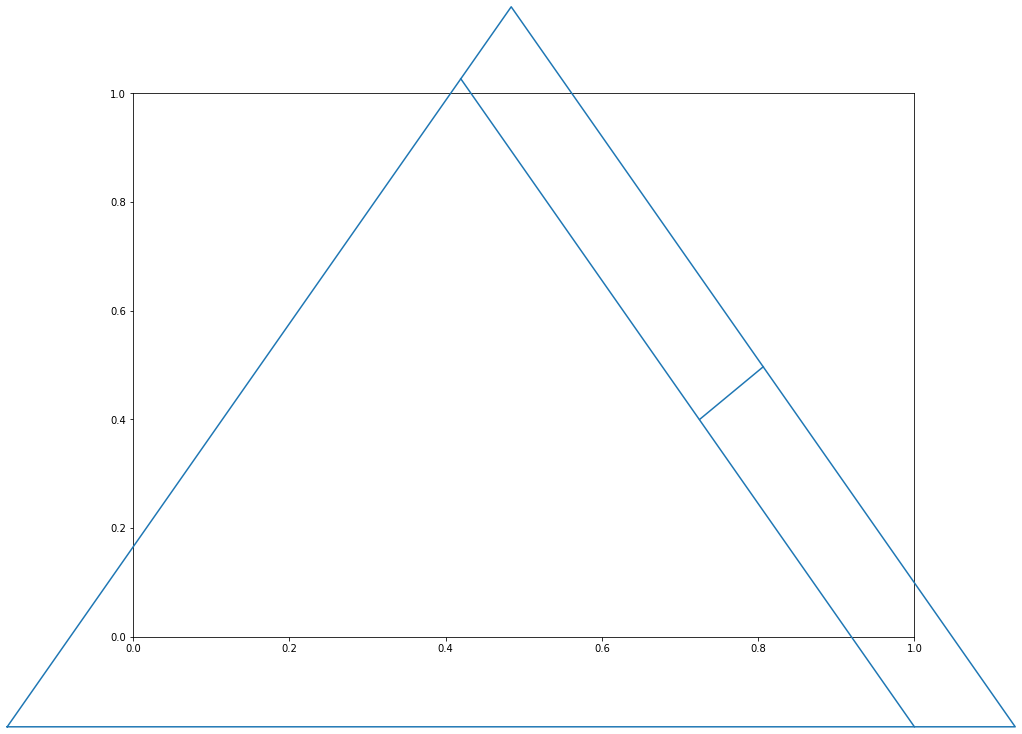

In [93]:
# Implementation of matplotlib function
import matplotlib.pyplot as plt
import matplotlib.lines as lines
  
h = (3**(1/2))/(2)
print(h)
fig = plt.figure(figsize =(14, 10))
fig.add_artist(lines.Line2D([0, 0.5, 1, 0], [0, 1, 0, 0])) # X n Y data
fig.add_artist(lines.Line2D([0.45, 0.9], [0.9, 0]))
fig.add_artist(lines.Line2D([0.75, 0.687], [0.5, 0.427]))

ax = fig.add_subplot(111)


  
plt.show()


#https://jbendeaton.com/blog/2011/ternary-plots-matplotlib